# <font color='blue'>Credit Card Fraud Detecion</font>

## Table of Contents 
6. [Preparing Training and Testing Sets](#f_ID)

    6.1 [Splitting into Train and Test Sets](#f1_ID)
    
    6.2 [Feature Scaling](#f2_ID)
    
    6.3 [SMOTE](#f3_ID)
    
7. [Feature Selection](#g_ID)

    7.1 [Recursive feature elimination with Cross-validation](#g1_ID)

8. [Feature Extraction](#h_ID)

    8.1 [Prinicpal Component Analysis (PCA)](#h1_ID)

## <a id="f_ID">6. Preparing Training and Testing Sets</a>

In [23]:
# Reformat X variables
X = creditcard.iloc[:, :-1]
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0
284803,172787,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24
284804,172788,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67
284805,172788,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10


In [24]:
# Reformat y variable
y = creditcard.iloc[:, -1]
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 283726, dtype: int8

### <a id="f1_ID">6.1 Splitting into Train and Test Sets</a>

In [25]:
# Import Train Test Split library
from sklearn.model_selection import train_test_split

In [26]:
# Split train set (75%) and test set (25%), shuffle = True (default)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [27]:
# Check dimensions of train and test sets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(212794, 30)
(70932, 30)
(212794,)
(70932,)


### <a id="f2_ID">6.2 Feature Scaling</a>

Feature scaling standardizes features and scales to unit variance. This allows for all features to be on the same scale, so machine learning models do not become sensitive to large values.

In [28]:
# Import Standard Scaler library
from sklearn.preprocessing import StandardScaler

In [29]:
# Instantiate Standard Scaler object and fit to train data
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)

In [30]:
# Fit to test data 
X_test_sc = sc.fit_transform(X_test)

In [31]:
# Create dataframe with scaled X train data
df = pd.DataFrame(X_train_sc, columns = ["Time", "V1", "V2", "V3", "V4", "V5", "V6", "V7", "V8", "V9", "V10", "V11", "V12", "V13", "V14", "V15", "V16", "V17", "V18", "V19", "V20", "V21", "V22", "V23", "V24", "V25", "V26", "V27", "V28", "Amount"])
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.535296,0.351762,-0.500795,0.593660,0.523703,-0.579075,0.516214,-0.527687,0.289567,1.563867,...,0.206726,0.089217,-0.086176,-0.072836,-0.584177,-0.337740,0.780781,-0.138826,0.109658,0.509071
1,-1.198654,-0.566635,0.624540,0.835329,-0.682127,-0.089419,0.417702,-0.681916,-2.100175,0.166423,...,0.975068,-1.707371,1.131440,-0.222373,-0.851765,-0.136106,2.138311,0.699143,0.612125,-0.291531
2,1.008918,1.006160,-0.370358,-0.225330,0.227813,-0.536617,-0.030047,-0.701278,0.176174,1.122688,...,-0.347990,0.253933,0.911894,0.214323,-0.617331,-0.628869,1.197337,-0.077707,-0.196924,-0.315549
3,1.492265,0.907519,0.154829,-0.149127,2.306478,0.782434,2.029608,-0.577631,0.615145,-0.776495,...,-0.331388,-0.149390,-0.281399,0.720081,-1.666967,-1.271195,-0.627499,0.141029,-0.136791,-0.351576
4,0.619802,0.961135,0.071901,-1.329142,0.767343,0.638958,-0.478144,0.657484,-0.286411,-0.507138,...,-0.048324,0.324910,0.793919,-0.098555,1.204835,0.844280,-1.130931,-0.125726,-0.157990,-0.011320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212789,-0.399934,-0.100031,-1.978794,-0.719050,0.098629,-1.174676,-0.386106,0.634451,-0.340511,-0.584859,...,1.499495,0.017431,-1.850353,-1.264896,-0.106842,0.269567,2.147563,-0.606477,0.416676,3.046981
212790,1.360973,0.073848,0.604641,-0.402245,-0.555115,0.892683,-0.150098,0.695140,0.056596,-0.253040,...,0.058638,-0.452929,-1.125877,0.013477,-0.017576,-0.725187,0.264254,0.548360,0.208490,-0.351576
212791,-0.311726,0.645822,-0.028970,-0.479482,0.053180,1.344262,2.728451,-0.664825,0.786533,0.119331,...,-0.005140,0.098579,0.145227,-0.173185,1.660291,1.292085,-0.570714,0.110774,0.075154,-0.335564
212792,-0.131624,1.018666,-0.080811,-0.770535,0.336487,-0.032609,-0.808048,0.247263,-0.316471,0.416861,...,-0.146131,-0.293891,-0.650838,0.396080,0.041984,-0.374918,0.563388,-0.186179,-0.172570,-0.195459


### <a id="f3_ID">6.3 SMOTE</a>

SMOTE (Synthetic Minority Over-sampling Technique) oversamples the minority class (fraudulent cases) to address the class imbalance present in the data.

In [32]:
# Create a new dataframe from scaled X train data named "X"
X = df.iloc[:, :]
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.535296,0.351762,-0.500795,0.593660,0.523703,-0.579075,0.516214,-0.527687,0.289567,1.563867,...,0.206726,0.089217,-0.086176,-0.072836,-0.584177,-0.337740,0.780781,-0.138826,0.109658,0.509071
1,-1.198654,-0.566635,0.624540,0.835329,-0.682127,-0.089419,0.417702,-0.681916,-2.100175,0.166423,...,0.975068,-1.707371,1.131440,-0.222373,-0.851765,-0.136106,2.138311,0.699143,0.612125,-0.291531
2,1.008918,1.006160,-0.370358,-0.225330,0.227813,-0.536617,-0.030047,-0.701278,0.176174,1.122688,...,-0.347990,0.253933,0.911894,0.214323,-0.617331,-0.628869,1.197337,-0.077707,-0.196924,-0.315549
3,1.492265,0.907519,0.154829,-0.149127,2.306478,0.782434,2.029608,-0.577631,0.615145,-0.776495,...,-0.331388,-0.149390,-0.281399,0.720081,-1.666967,-1.271195,-0.627499,0.141029,-0.136791,-0.351576
4,0.619802,0.961135,0.071901,-1.329142,0.767343,0.638958,-0.478144,0.657484,-0.286411,-0.507138,...,-0.048324,0.324910,0.793919,-0.098555,1.204835,0.844280,-1.130931,-0.125726,-0.157990,-0.011320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212789,-0.399934,-0.100031,-1.978794,-0.719050,0.098629,-1.174676,-0.386106,0.634451,-0.340511,-0.584859,...,1.499495,0.017431,-1.850353,-1.264896,-0.106842,0.269567,2.147563,-0.606477,0.416676,3.046981
212790,1.360973,0.073848,0.604641,-0.402245,-0.555115,0.892683,-0.150098,0.695140,0.056596,-0.253040,...,0.058638,-0.452929,-1.125877,0.013477,-0.017576,-0.725187,0.264254,0.548360,0.208490,-0.351576
212791,-0.311726,0.645822,-0.028970,-0.479482,0.053180,1.344262,2.728451,-0.664825,0.786533,0.119331,...,-0.005140,0.098579,0.145227,-0.173185,1.660291,1.292085,-0.570714,0.110774,0.075154,-0.335564
212792,-0.131624,1.018666,-0.080811,-0.770535,0.336487,-0.032609,-0.808048,0.247263,-0.316471,0.416861,...,-0.146131,-0.293891,-0.650838,0.396080,0.041984,-0.374918,0.563388,-0.186179,-0.172570,-0.195459


In [33]:
# Create new variable "y" from y train data
y = y_train
y

12490     0
34872     0
221780    0
273685    0
179738    0
         ..
120348    0
260136    0
132427    0
147428    0
122429    0
Name: Class, Length: 212794, dtype: int8

In [34]:
# Check shape of x and y variables
print(X.shape)
print(y.shape)

(212794, 30)
(212794,)


In [35]:
# Import SMOTE library
from imblearn.over_sampling import SMOTE

In [38]:
# Instantiate SMOTE object
smote = SMOTE()

# Fit x and y variables 
X_train_sc_smote , y_train_smote = smote.fit_sample(X, y)

print('Origianl dataset shape:\n', y.value_counts())
print('Resampple dataset shape:\n', y_train_smote.value_counts())

Origianl dataset shape:
 0    212433
1       361
Name: Class, dtype: int64
Resampple dataset shape:
 1    212433
0    212433
Name: Class, dtype: int64


In [39]:
# Check dimensions of train set, test set, and SMOTE set
print(X_train_sc.shape)
print(y_train.shape)
print(X_test_sc.shape)
print(y_test.shape)
print(X_train_sc_smote.shape)
print(y_train_smote.shape)

(212794, 30)
(212794,)
(70932, 30)
(70932,)
(424866, 30)
(424866,)


## <a id="g_ID">7. Feature Selection</a>

### <a id="g1_ID">7.1 Recursive Feature Elimination with Cross-validation</a>

Recursive Feature Elimination (RFE) is a feature selection method that removes the weakest features until an optimal number of features is selected.

In [40]:
# Import Stratifited KFold and RFECV libraries
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

In [41]:
# Import logistic regression library
from sklearn.linear_model import LogisticRegression

In [42]:
# Instantiate logistic regression object
logit = LogisticRegression(multi_class='ovr', solver='lbfgs')

In [43]:
# Create RFE object and fit to data
rfecv = RFECV(estimator=logit, step=1, cv=StratifiedKFold(10), scoring='accuracy')
rfecv.fit(X_train_sc_smote, y_train_smote)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=LogisticRegression(multi_class='ovr'), scoring='accuracy')

In [44]:
# Determine optimal number of features
print(f"Optimal number of features : {rfecv.n_features_}")

Optimal number of features : 26


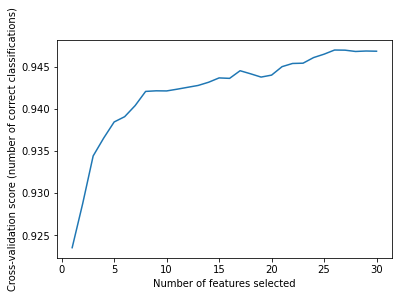

In [45]:
# Plot number of features selected vs. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score (number of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [46]:
# Show grid scores
rfecv.grid_scores_

array([0.92351941, 0.92875165, 0.93443109, 0.93655176, 0.93847236,
       0.93909844, 0.94041886, 0.94210645, 0.94217706, 0.94216294,
       0.94237006, 0.94259366, 0.94281491, 0.94319621, 0.94371166,
       0.94365753, 0.94456605, 0.94420123, 0.94381052, 0.94404353,
       0.94505091, 0.94542985, 0.9454628 , 0.9461289 , 0.94653373,
       0.947028  , 0.94701153, 0.94685618, 0.94691032, 0.94688678])

In [47]:
# Show support
rfecv.support_ 

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True, False,  True,  True, False, False,  True,
        True,  True,  True])

In [48]:
# Show Ranking
rfecv.ranking_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 3,
       1, 1, 5, 4, 1, 1, 1, 1])

In [49]:
# Show features
X_train_sc_smote.columns[list(rfecv.support_)]

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V16', 'V17', 'V18', 'V19', 'V20', 'V22',
       'V23', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [50]:
# Create dataframe with features and support
pd.DataFrame(rfecv.support_, index=X.columns,columns=['Support'])

,Support
Time,True
V1,True
V2,True
V3,True
V4,True
V5,True
V6,True
V7,True
V8,True
V9,True


In [52]:
# Create dataframe with features and rank
rf_df = pd.DataFrame(rfecv.ranking_,index=X.columns,columns=['Rank']).sort_values(by='Rank',ascending=True)
rf_df

,Rank
Time,1
V27,1
V26,1
V23,1
V22,1
V20,1
V19,1
V18,1
V17,1
V16,1


In [53]:
# Fit to X train data
X_train_rfe = rfecv.transform(X_train_sc_smote)

In [54]:
# Fit to X test data
X_test_rfe = rfecv.transform(X_test_sc)

Using RFE CV, the optimal number of features selected was 26. For the estimator parameter, logistic was chosen over support vector classifier and random forest as it was more efficent.

## <a id="h_ID">8. Feature Extraction</a>

### <a id="h1_ID">8.1 Prinicpal Component Analysis (PCA)</a>

Prinicpal Component Analysis (PCA) is a linear dimensionality reduction using singular value decompositon to a lower dimensional space.

In [55]:
# Import decomposition and PCA libraries 
from sklearn import decomposition
from sklearn.decomposition import PCA

In [56]:
np.random.seed(6)

In [57]:
# Instantiate PCA object with n_components = 5 and fit to data
pca = decomposition.PCA(n_components=5)
pca.fit(X_train_sc_smote)

PCA(n_components=5)

In [58]:
X_smote_pca = pca.transform(X_train_sc_smote)

In [59]:
X_smote_pca

array([[-8.42240271e+00,  1.25459544e+00, -7.79188203e-01,
         4.94188256e-01,  6.55352547e-01],
       [-8.29046320e+00,  2.93045252e+00,  5.75695111e-01,
         1.45398099e+00,  2.01688527e+00],
       [-8.42482939e+00,  1.23011914e+00, -1.10516525e+00,
         9.74594668e-01,  1.66584914e-01],
       ...,
       [-8.38015477e+00,  9.07895420e-01, -1.18004530e+00,
         9.51596897e-01,  1.23008719e-02],
       [ 1.22391152e+00, -3.63708863e+00,  3.31590892e+00,
        -2.77211955e+00,  6.97741270e-02],
       [ 2.70159798e+01,  7.02670951e+00, -1.87429626e+01,
        -1.58912752e+01,  1.03113802e+00]])

In [60]:
X_smote_pca.shape

(424866, 5)

The dimension of the dataset after applying PCA is (424866, 5).

In [61]:
pca.n_components_

5

In [62]:
pca.explained_variance_

array([170.39853607,  21.79788888,  14.45850075,  12.11228395,
         3.15828008])

In [63]:
pca.explained_variance_ratio_

array([0.6946393 , 0.08886033, 0.0589409 , 0.04937641, 0.01287491])

In [64]:
# The amount of variance that each PC explains
var_Data= pca.explained_variance_ratio_
# Cumulative Variance explained
cum_var_Data=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=7)*100)
cum_var_Data

array([69.46393, 78.34996, 84.24405, 89.18169, 90.46918])

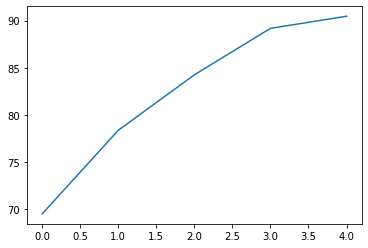

In [65]:
plt.plot(cum_var_Data)
plt.show()

In [66]:
X_test_pca = pca.transform(X_test_sc)

In [67]:
X_test_pca.shape

(70932, 5)

In [68]:
np.random.seed(3)

In [69]:
# Instantiate PCA object with n_components = 30 and fit to data
pca_30 = decomposition.PCA(n_components=30)
pca_30.fit(X_train_sc_smote)

PCA(n_components=30)

In [70]:
X_smote_pca_30 = pca_30.transform(X_train_sc_smote)

In [71]:
X_smote_pca_30

array([[-8.42240271e+00,  1.25459533e+00, -7.79189739e-01, ...,
        -4.56777296e-01,  1.00177091e+00, -2.00039921e-02],
       [-8.29046320e+00,  2.93045274e+00,  5.75695917e-01, ...,
         1.12575875e-01, -1.23219566e+00,  8.85181619e-02],
       [-8.42482939e+00,  1.23011905e+00, -1.10516556e+00, ...,
         2.68952163e-01,  1.54502569e-01,  3.51869336e-03],
       ...,
       [-8.38015477e+00,  9.07895417e-01, -1.18004522e+00, ...,
         6.55382011e-01, -5.29300669e-01, -1.60232142e-01],
       [ 1.22391152e+00, -3.63708860e+00,  3.31590871e+00, ...,
        -1.95607824e-01, -1.78410693e-01,  2.21093053e-02],
       [ 2.70159798e+01,  7.02670952e+00, -1.87429627e+01, ...,
        -4.34365377e-02,  1.79159064e-01,  5.46913164e-02]])

In [72]:
X_smote_pca_30.shape

(424866, 30)

The dimension of the dataset after applying PCA is (424866, 30).

In [73]:
pca_30.n_components_

30

In [74]:
pca_30.explained_variance_

array([1.70398536e+02, 2.17978889e+01, 1.44585008e+01, 1.21122840e+01,
       3.15828943e+00, 1.89992304e+00, 1.76682820e+00, 1.63174582e+00,
       1.57982145e+00, 1.42333151e+00, 1.32648086e+00, 1.27811889e+00,
       1.13271548e+00, 1.04394191e+00, 9.73108861e-01, 9.11060244e-01,
       8.45707382e-01, 8.25672681e-01, 7.58767034e-01, 7.21195384e-01,
       7.11089985e-01, 6.94513075e-01, 6.72041007e-01, 6.57900925e-01,
       6.37819212e-01, 5.40622783e-01, 5.35410974e-01, 5.24631775e-01,
       2.44820165e-01, 4.22935096e-02])

In [75]:
pca_30.explained_variance_ratio_

array([6.94639300e-01, 8.88603308e-02, 5.89408987e-02, 4.93764127e-02,
       1.28749461e-02, 7.74514409e-03, 7.20257538e-03, 6.65190441e-03,
       6.44023177e-03, 5.80229166e-03, 5.40747450e-03, 5.21032415e-03,
       4.61757892e-03, 4.25568844e-03, 3.96693348e-03, 3.71398878e-03,
       3.44757412e-03, 3.36590153e-03, 3.09315687e-03, 2.93999390e-03,
       2.89879867e-03, 2.83122195e-03, 2.73961330e-03, 2.68197045e-03,
       2.60010621e-03, 2.20387945e-03, 2.18263321e-03, 2.13869120e-03,
       9.98023294e-04, 1.72411892e-04])

In [76]:
# The amount of variance that each PC explains
var_Data= pca_30.explained_variance_ratio_
# Cumulative Variance explained
cum_var_Data_30=np.cumsum(np.round(pca_30.explained_variance_ratio_, decimals=7)*100)
cum_var_Data_30

array([69.46393, 78.34996, 84.24405, 89.18169, 90.46918, 91.24369,
       91.96395, 92.62914, 93.27316, 93.85339, 94.39414, 94.91517,
       95.37693, 95.8025 , 96.19919, 96.57059, 96.91535, 97.25194,
       97.56126, 97.85526, 98.14514, 98.42826, 98.70222, 98.97042,
       99.23043, 99.45082, 99.66908, 99.88295, 99.98275, 99.99999])

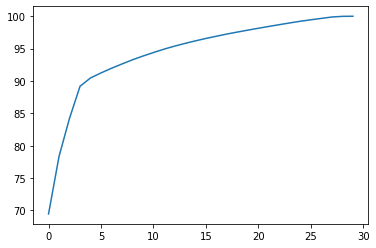

In [77]:
plt.plot(cum_var_Data_30)
plt.show()

In [78]:
X_test_pca_30 = pca_30.transform(X_test_sc)

In [79]:
X_test_pca_30.shape

(70932, 30)

In [80]:
np.random.seed(5)

In [81]:
# Instantiate PCA object with n_components = 15 and fit to data
pca_15 = decomposition.PCA(n_components=15)
pca_15.fit(X_train_sc_smote)

PCA(n_components=15)

In [82]:
X_smote_pca_15 = pca_15.transform(X_train_sc_smote)

In [83]:
X_smote_pca_15

array([[-8.42240271e+00,  1.25459533e+00, -7.79189672e-01, ...,
         1.80502327e-01,  4.74015666e-01, -6.90199915e-01],
       [-8.29046320e+00,  2.93045273e+00,  5.75695947e-01, ...,
        -1.97993943e-01, -5.48755506e-01,  1.29373322e-01],
       [-8.42482939e+00,  1.23011905e+00, -1.10516545e+00, ...,
        -2.16617693e-01,  2.14793350e-02,  8.28840953e-01],
       ...,
       [-8.38015477e+00,  9.07895416e-01, -1.18004523e+00, ...,
         3.89463445e-01, -5.66486969e-02,  4.57445426e-01],
       [ 1.22391152e+00, -3.63708859e+00,  3.31590880e+00, ...,
        -1.09811471e+00,  2.90210944e-03,  5.00730691e-01],
       [ 2.70159798e+01,  7.02670952e+00, -1.87429627e+01, ...,
         7.68962890e-01,  1.52710781e-01,  1.81273998e-01]])

In [84]:
X_smote_pca_15.shape

(424866, 15)

The dimension of the dataset after applying PCA is (424866, 15).

In [85]:
pca_15.n_components_

15

In [86]:
pca_15.explained_variance_

array([170.39853607,  21.79788888,  14.45850075,  12.11228395,
         3.15828908,   1.89991676,   1.76673417,   1.63165252,
         1.57980481,   1.42328931,   1.32626245,   1.27807719,
         1.13220351,   1.04241134,   0.97218615])

In [87]:
pca_15.explained_variance_ratio_

array([0.6946393 , 0.08886033, 0.0589409 , 0.04937641, 0.01287494,
       0.00774512, 0.00720219, 0.00665152, 0.00644016, 0.00580212,
       0.00540658, 0.00521015, 0.00461549, 0.00424945, 0.00396317])

In [88]:
# The amount of variance that each PC explains
var_Data= pca_15.explained_variance_ratio_
# Cumulative Variance explained
cum_var_Data_15=np.cumsum(np.round(pca_15.explained_variance_ratio_, decimals=7)*100)
cum_var_Data_15

array([69.46393, 78.34996, 84.24405, 89.18169, 90.46918, 91.24369,
       91.96391, 92.62906, 93.27308, 93.85329, 94.39395, 94.91497,
       95.37652, 95.80146, 96.19778])

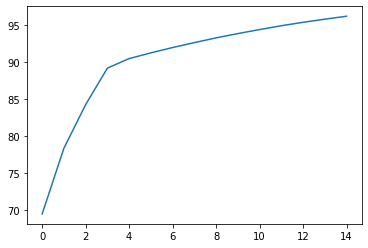

In [89]:
plt.plot(cum_var_Data_15)
plt.show()

In [90]:
X_test_pca_15 = pca_15.transform(X_test_sc)

In [91]:
X_test_pca_15.shape

(70932, 15)

For our analysis, we will use PCA with 15 components.